In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV data into a DataFrame
file_path = 'Financial KPI for Startups.csv'
df = pd.read_csv('Financial KPI for Startups.csv')




In [9]:
df.head()

,Date,Month Name,Quarter,Year,Revenue,Expenses,Customers,Customer_Name,Region,New_Customers,Churn_Rate,CAC,LTV,Burn_Rate,LTV_CAC_Ratio,Run_Rate,Cohort_Month
0,1/1/2023,January,1,2023,20795,35208,461,Aarav Sharma,North,39,0.078,609,3473,14413,5.70,249540,1/1/2023
1,1/2/2023,January,1,2023,5860,27614,254,Vihaan Patel,South,36,0.035,660,6544,21754,9.92,70320,1/1/2023
2,1/3/2023,January,1,2023,43158,8488,128,Aditya Rao,East,40,0.135,1794,7603,-34670,4.24,517896,1/1/2023
3,1/4/2023,January,1,2023,49732,47882,173,Rohit Kumar,West,17,0.074,1187,8183,-1850,6.89,596784,1/1/2023
4,1/5/2023,January,1,2023,16284,33923,477,Kiran Nair,North,10,0.109,1640,7337,17639,4.47,195408,1/1/2023


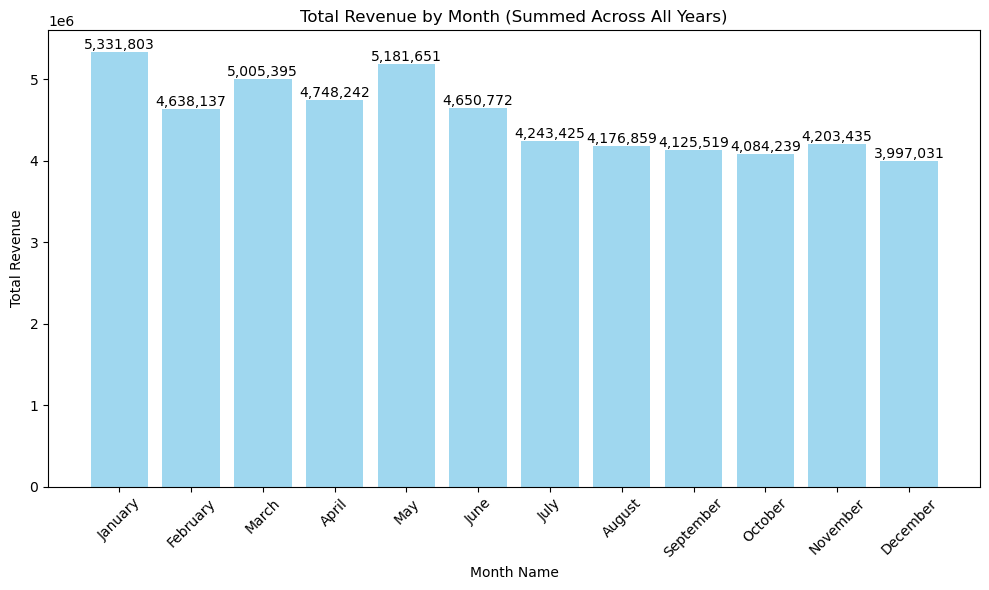

In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Sum revenue for each month across all years
month_sum = df.groupby('Month Name', observed=True)['Revenue'].sum().reindex(month_order)

# Create bar chart and add values (labels) above bars
plt.figure(figsize=(10,6))
bars = plt.bar(month_sum.index, month_sum.values, color='skyblue', alpha=0.8)
plt.title('Total Revenue by Month (Summed Across All Years)')
plt.xlabel('Month Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels above bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()

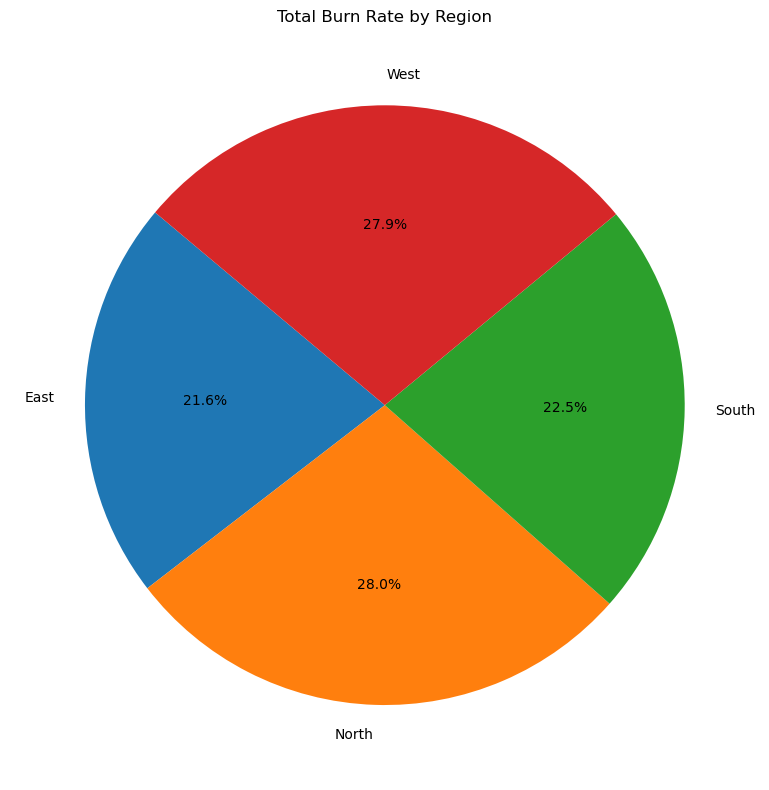

  Region  Burn_Rate
0   East    2782259
1  North    3616684
2  South    2903394
3   West    3599862


In [17]:
# Calculate total burn rate by region
region_burn_rate = df.groupby('Region', observed=True)['Burn_Rate'].sum().reset_index()

# Pie chart with data labels
plt.figure(figsize=(8,8))
plt.pie(region_burn_rate['Burn_Rate'],
        labels=region_burn_rate['Region'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Total Burn Rate by Region')
plt.tight_layout()
plt.show()

# Data labels for each region
print(region_burn_rate)

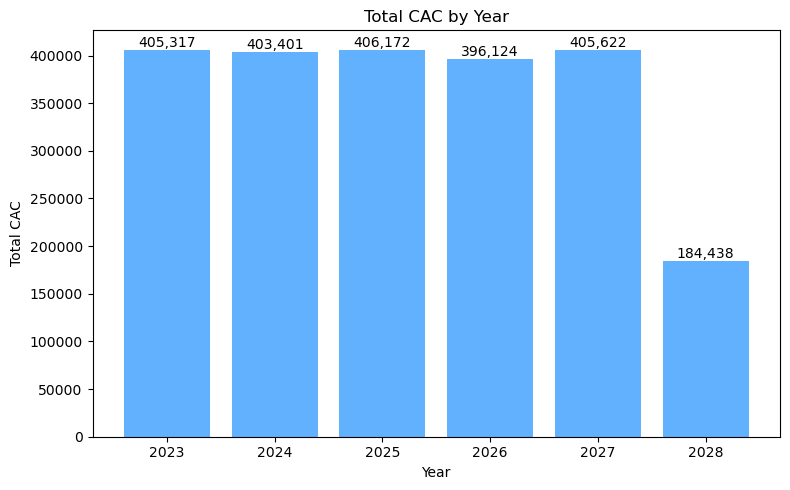

   Year     CAC
0  2023  405317
1  2024  403401
2  2025  406172
3  2026  396124
4  2027  405622
5  2028  184438


In [18]:
yearly_cac = df.groupby('Year', observed=True)['CAC'].sum().reset_index()

# Bar chart for year-wise CAC with data labels
plt.figure(figsize=(8,5))
bars = plt.bar(yearly_cac['Year'], yearly_cac['CAC'], color='dodgerblue', alpha=0.7)
plt.title('Total CAC by Year')
plt.xlabel('Year')
plt.ylabel('Total CAC')
plt.tight_layout()

# Add value labels to bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.show()

# Show year-wise CAC totals
print(yearly_cac)

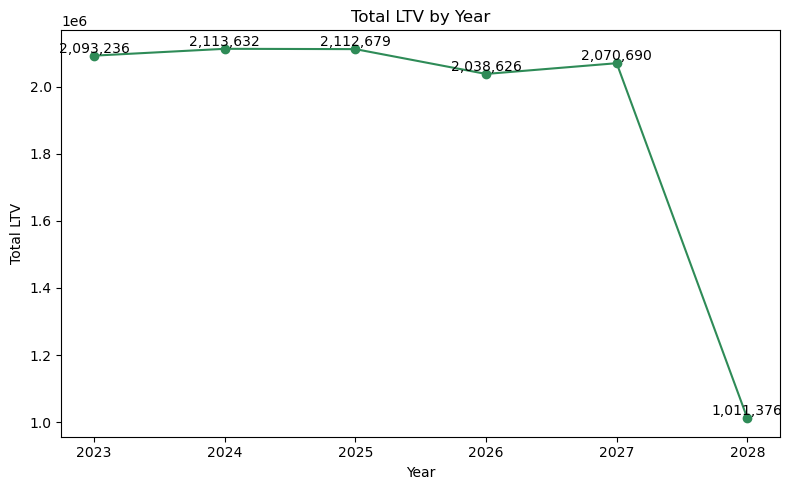

   Year      LTV
0  2023  2093236
1  2024  2113632
2  2025  2112679
3  2026  2038626
4  2027  2070690
5  2028  1011376


In [19]:
# Aggregate LTV by year
yearly_ltv = df.groupby('Year', observed=True)['LTV'].sum().reset_index()

# Line chart for year-wise LTV with data labels
plt.figure(figsize=(8,5))
plt.plot(yearly_ltv['Year'], yearly_ltv['LTV'], marker='o', linestyle='-', color='seagreen')
plt.title('Total LTV by Year')
plt.xlabel('Year')
plt.ylabel('Total LTV')
plt.tight_layout()

# Add value labels on each point
for idx, row in yearly_ltv.iterrows():
    plt.text(row['Year'], row['LTV'], f'{int(row['LTV']):,}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Print LTV totals for each year
print(yearly_ltv)

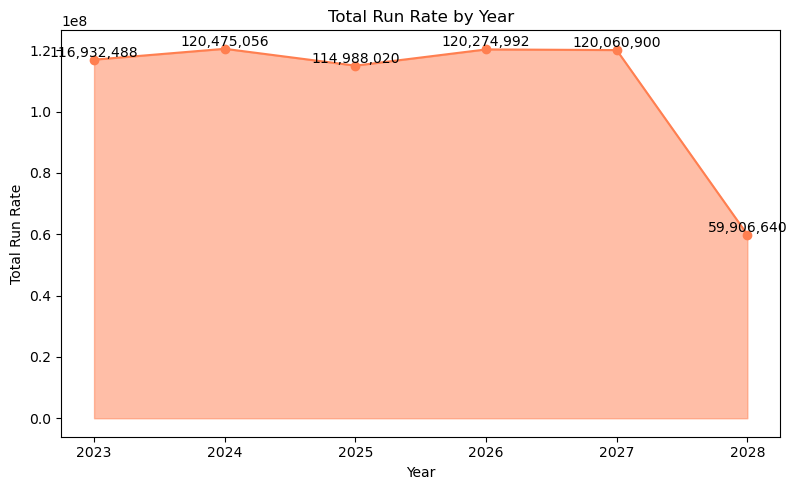

   Year   Run_Rate
0  2023  116932488
1  2024  120475056
2  2025  114988020
3  2026  120274992
4  2027  120060900
5  2028   59906640


In [20]:
# Aggregate Run Rate by year
yearly_runrate = df.groupby('Year', observed=True)['Run_Rate'].sum().reset_index()

# Area chart for year-wise Run Rate with data labels
plt.figure(figsize=(8,5))
plt.fill_between(yearly_runrate['Year'], yearly_runrate['Run_Rate'], color='coral', alpha=0.5)
plt.plot(yearly_runrate['Year'], yearly_runrate['Run_Rate'], marker='o', linestyle='-', color='coral')
plt.title('Total Run Rate by Year')
plt.xlabel('Year')
plt.ylabel('Total Run Rate')
plt.tight_layout()

# Add value labels at each data point
for idx, row in yearly_runrate.iterrows():
    plt.text(row['Year'], row['Run_Rate'], f'{int(row['Run_Rate']):,}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Print run rate totals for each year
print(yearly_runrate)

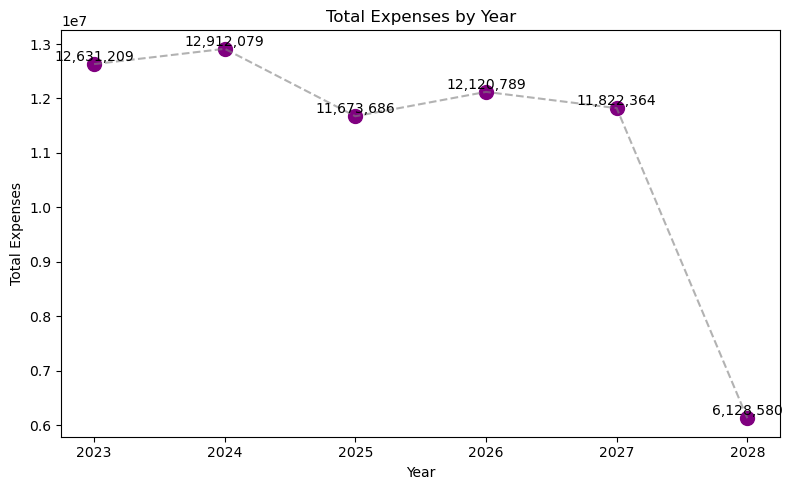

   Year  Expenses
0  2023  12631209
1  2024  12912079
2  2025  11673686
3  2026  12120789
4  2027  11822364
5  2028   6128580


In [22]:
# Aggregate expenses by year
yearly_expenses = df.groupby('Year', observed=True)['Expenses'].sum().reset_index()

# Scatter plot for yearly expenses with data labels
plt.figure(figsize=(8,5))
plt.scatter(yearly_expenses['Year'], yearly_expenses['Expenses'], color='purple', s=100)
plt.plot(yearly_expenses['Year'], yearly_expenses['Expenses'], linestyle='--', color='grey', alpha=0.6)
plt.title('Total Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenses')
plt.tight_layout()

# Add value labels at each point
for idx, row in yearly_expenses.iterrows():
    plt.text(row['Year'], row['Expenses'], f'{int(row['Expenses']):,}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Print yearly expense totals
print(yearly_expenses)

In [27]:
# Count of customer entries
customer_count = df['Customer_Name'].count()

print("Total customer record count):", customer_count)

Total customer record count): 2000


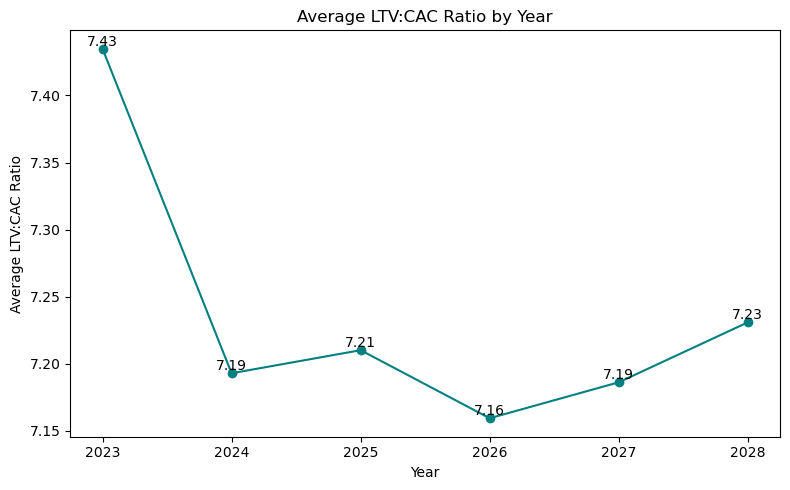

   Year  LTV_CAC_Ratio
0  2023       7.434730
1  2024       7.192957
2  2025       7.210160
3  2026       7.159441
4  2027       7.186225
5  2028       7.230885


In [28]:
# Compute LTV:CAC ratio for each entry
df['LTV_CAC_Ratio'] = df['LTV'] / df['CAC']

# Aggregate average LTV:CAC ratio by year
yearly_ratio = df.groupby('Year', observed=True)['LTV_CAC_Ratio'].mean().reset_index()

# Line chart for yearly LTV:CAC ratio with data labels
plt.figure(figsize=(8,5))
plt.plot(yearly_ratio['Year'], yearly_ratio['LTV_CAC_Ratio'], marker='o', linestyle='-', color='teal')
plt.title('Average LTV:CAC Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average LTV:CAC Ratio')
plt.tight_layout()

# Add value labels
for idx, row in yearly_ratio.iterrows():
    plt.text(row['Year'], row['LTV_CAC_Ratio'], f'{row['LTV_CAC_Ratio']:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Print yearly average LTV:CAC ratios
print(yearly_ratio)

In [29]:
# Parse dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Cohort_Month'] = pd.to_datetime(df['Cohort_Month'], errors='coerce')

# Set cohort and activity month as period
df['Activity_Month'] = df['Date'].dt.to_period('M')
df['Cohort_Month'] = df['Cohort_Month'].dt.to_period('M')

# Count customers per (cohort_month, activity_month)
cohort_summary = df.groupby(['Cohort_Month', 'Activity_Month'])['Customers'].sum().reset_index()

# Pivot for table format: rows as cohort, columns as activity month
cohort_table = cohort_summary.pivot_table(index='Cohort_Month', columns='Activity_Month', values='Customers', fill_value=0)

# Convert to records for display/usage
cohort_table_display = cohort_table.reset_index()
print(cohort_table_display.head(10))

Activity_Month Cohort_Month  2023-01  2023-02  2023-03  2023-04  2023-05  \
0                   2023-01   7885.0      0.0      0.0      0.0      0.0   
1                   2023-02      0.0   7469.0      0.0      0.0      0.0   
2                   2023-03      0.0      0.0   7765.0      0.0      0.0   
3                   2023-04      0.0      0.0      0.0   8026.0      0.0   
4                   2023-05      0.0      0.0      0.0      0.0   8434.0   
5                   2023-06      0.0      0.0      0.0      0.0      0.0   
6                   2023-07      0.0      0.0      0.0      0.0      0.0   
7                   2023-08      0.0      0.0      0.0      0.0      0.0   
8                   2023-09      0.0      0.0      0.0      0.0      0.0   
9                   2023-10      0.0      0.0      0.0      0.0      0.0   

Activity_Month  2023-06  2023-07  2023-08  2023-09  ...  2027-09  2027-10  \
0                   0.0      0.0      0.0      0.0  ...      0.0      0.0   
1        